# 2023-02-02 오전 OpenCV
- 참고서적: 정성환・배종욱, 『OpenCV-Python으로 배우는 영상 처리 및 응용』, 생능출판(2020)

In [ ]:
# (연습문제) OpenCV함수 중에서 cv2.addWeighted() 함수를 사용해서 두 영상을 합성하는 프로그램을 작성하시오

import numpy as np
import cv2

img1 = cv2.imread("DIY/example/chap06/images/add1.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
img2 = cv2.imread("DIY/example/chap06/images/add2.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기

if img1 is None or img2 is None:
     raise Exception("영상 파일 읽기 오류 발생")

h, w = img1.shape[:2] # img1.shape -> (높이, 너비, RGB)
alpha, beta = 0.5, 0.5 # alpha + beta = 1

dst = cv2.repeat(img1, 1, 3)
dst[:, w:w+w] = cv2.addWeighted(img1, alpha, img2, beta, 0)
dst[:, w*2:w*3] = img2

cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# (연습문제) 두 개의 트랙바를 추가해서 각 영상의 반영 비율을 조절할 수 있도록 수정하시오.

import numpy as np
import cv2

def onChange(value): # 트랙바 콜백 함수
    alpha = cv2.getTrackbarPos('img1', 'dst') / 100
    beta = cv2.getTrackbarPos('img2', 'dst') / 100
    dst[:, w:w+w] = cv2.addWeighted(img1, alpha, img2, beta, 0)
    cv2.imshow('dst', dst)

img1 = cv2.imread("DIY/example/chap06/images/add1.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
img2 = cv2.imread("DIY/example/chap06/images/add2.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기

if img1 is None or img2 is None:
    raise Exception("영상 파일 읽기 오류 발생")

h, w = img1.shape[:2]
dst = cv2.repeat(img1, 1, 3 )
dst[:, w:w+w] = 0
dst[:, w*2:w*3] = img2

cv2.imshow('dst', dst)
cv2.createTrackbar("img1", 'dst', 0, 100, onChange) # 트랙바 콜백 함수 등록
cv2.createTrackbar("img2" , 'dst', 0, 100, onChange) # 트랙바 콜백 함수 등록
onChange(50)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 히스토그램

- 관찰한 데이터의 특징을 한눈에 알아볼 수 있도록 데이터를 막대그래프 모양으로 나타낸 것 
- 디지털 영상에 대한 많은 정보를 제공함

    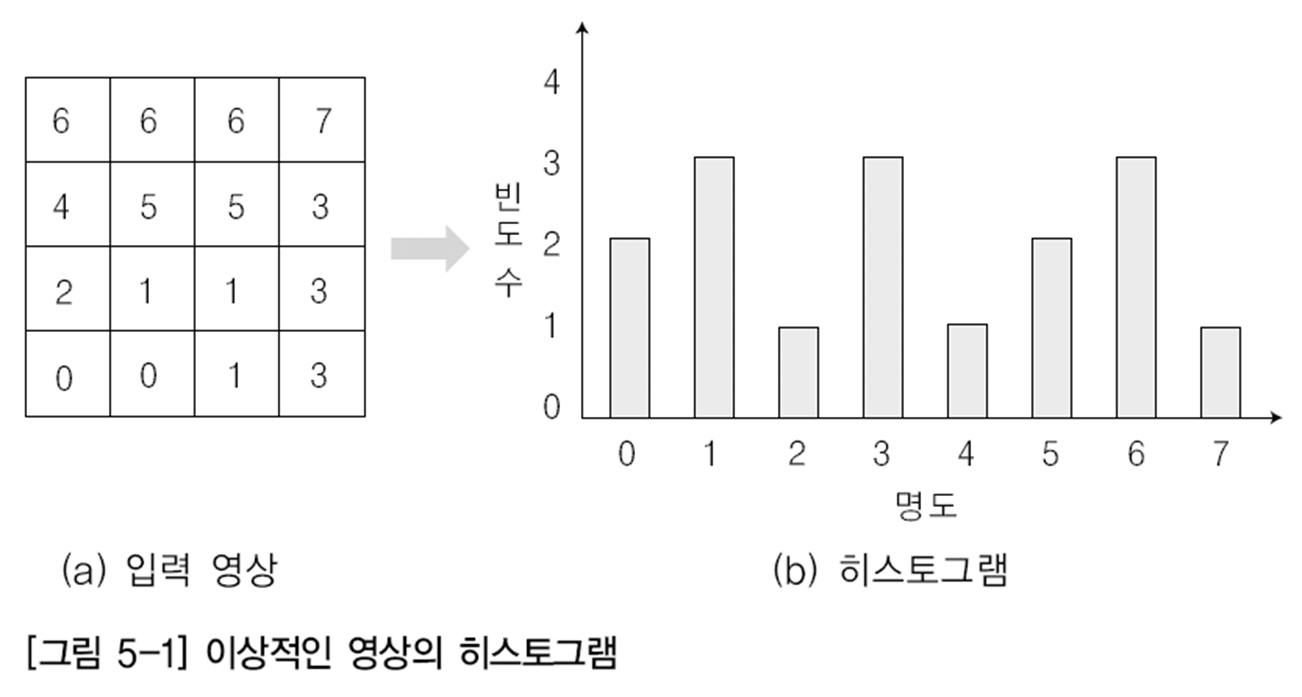

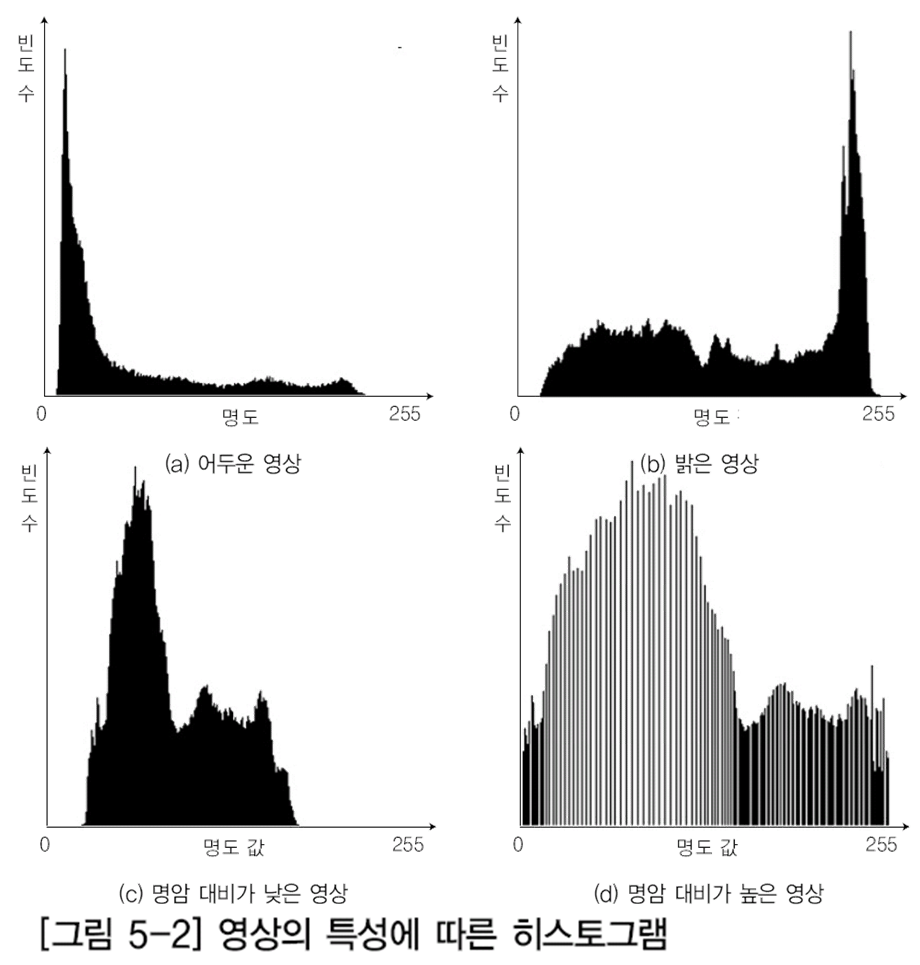

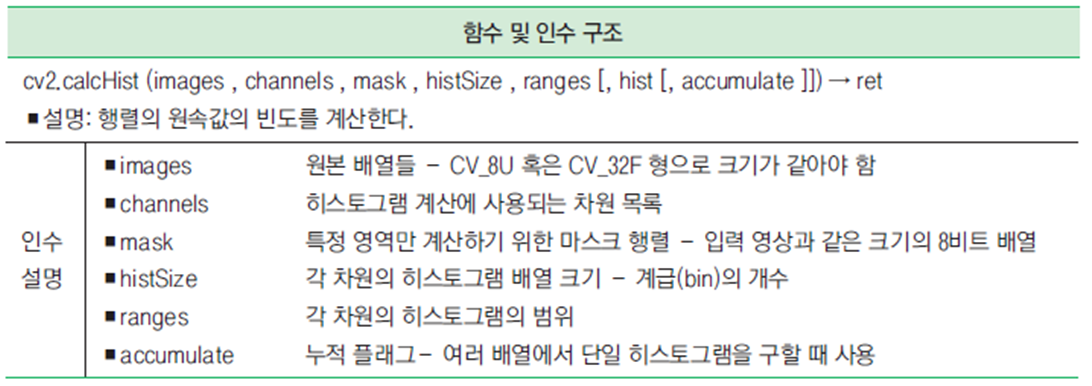

- image: 이미지 영상 [image]처럼 리스트로 전달
- channel: 분석 처리할 채널, 리스트로 전달
    - 1 채널: [0], 2 채널: [0, 1], 3 채널: [0, 1, 2]
- mask: 마스크에 지정한 픽셀만 히스토그램 계산, None이면 전체 영역
- histSize: 계급(Bin)의 개수, 채널 개수에 맞게 리스트로 표현
    - 1 채널: [256], 2 채널: [256, 256], 3 채널: [256, 256, 256]
- ranges: 각 픽셀이 가질 수 있는 값의 범위, RGB인 경우 [0, 256]

In [1]:
import numpy as np
import cv2
import time

def calc_histo1(image, hsize, ranges=[0, 256]):  # 행렬 원소의 1차원 히스토그램 계산
    hist = np.zeros((hsize, 1), np.float32)  # 히스토그램 누적 행렬
    gap = ranges[1] / hsize  # 계급 간격

    for row in image:  # 2차원 행렬 순회 방식
        for pix in row:
            idx = int(pix / gap)
            hist[idx] += 1
    return hist

def calc_histo2(image, hsize, ranges=[0, 256]):  # 행렬 원소의 1차원 히스토그램 계산
    hist = np.zeros((hsize, 1), np.float32)  # 히스토그램 누적 행렬
    gap = ranges[1] / hsize  # 계급 간격

    idxs = (image/gap).astype(int).flatten()
    for i in idxs:
        hist[i] += 1

    return hist


image = cv2.imread("DIY/example/chap06/images/pixel.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None:
    raise Exception("영상 파일 읽기 오류 발생")

th_img = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)[1] # 이진화 수행
cv2.imshow("th_img", th_img)
hsize, ranges = [16], [0, 256]  # 히스토그램 간격수, 값 범위

start = time.time()
hist = calc_histo1(image, hsize[0], ranges)  # 사용자 정의 히스토그램 계산
end = time.time()

print(f'실행시간 비교 calc_histo1: {end-start} sec')

start = time.time()
hist = calc_histo2(image, hsize[0], ranges)  # 사용자 정의 히스토그램 계산
end = time.time()

print(f'실행시간 비교 calc_histo2: {end-start} sec')

print("사용자 정의 함수: \n", hist.flatten())  # 행렬을 벡터로 변환하여 출력

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

실행시간 비교 calc_histo1: 0.22400355339050293 sec
실행시간 비교 calc_histo2: 0.11000967025756836 sec
사용자 정의 함수: 
 [ 344. 1564. 2976. 3675. 6792. 5799. 4974. 4820. 5930. 6571. 5575. 7696.
 8253. 5040. 1755.  236.]


In [ ]:
# 히스토그램 그리기

import numpy as np
import cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 150, -1)
        cv2.rectangle(hist_img, roi, 0, 1)

    return cv2.flip(hist_img, 0)                        # 영상 상하 뒤집기 후 반환

image = cv2.imread("DIY/example/chap06/images/draw_hist.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None:
    raise Exception("영상 파일 읽기 오류")
    
hist = cv2.calcHist([image], [0], None, [32], [0, 256])
hist_img = draw_histo(hist)

cv2.imshow("image", image)
cv2.imshow("hist_img", hist_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

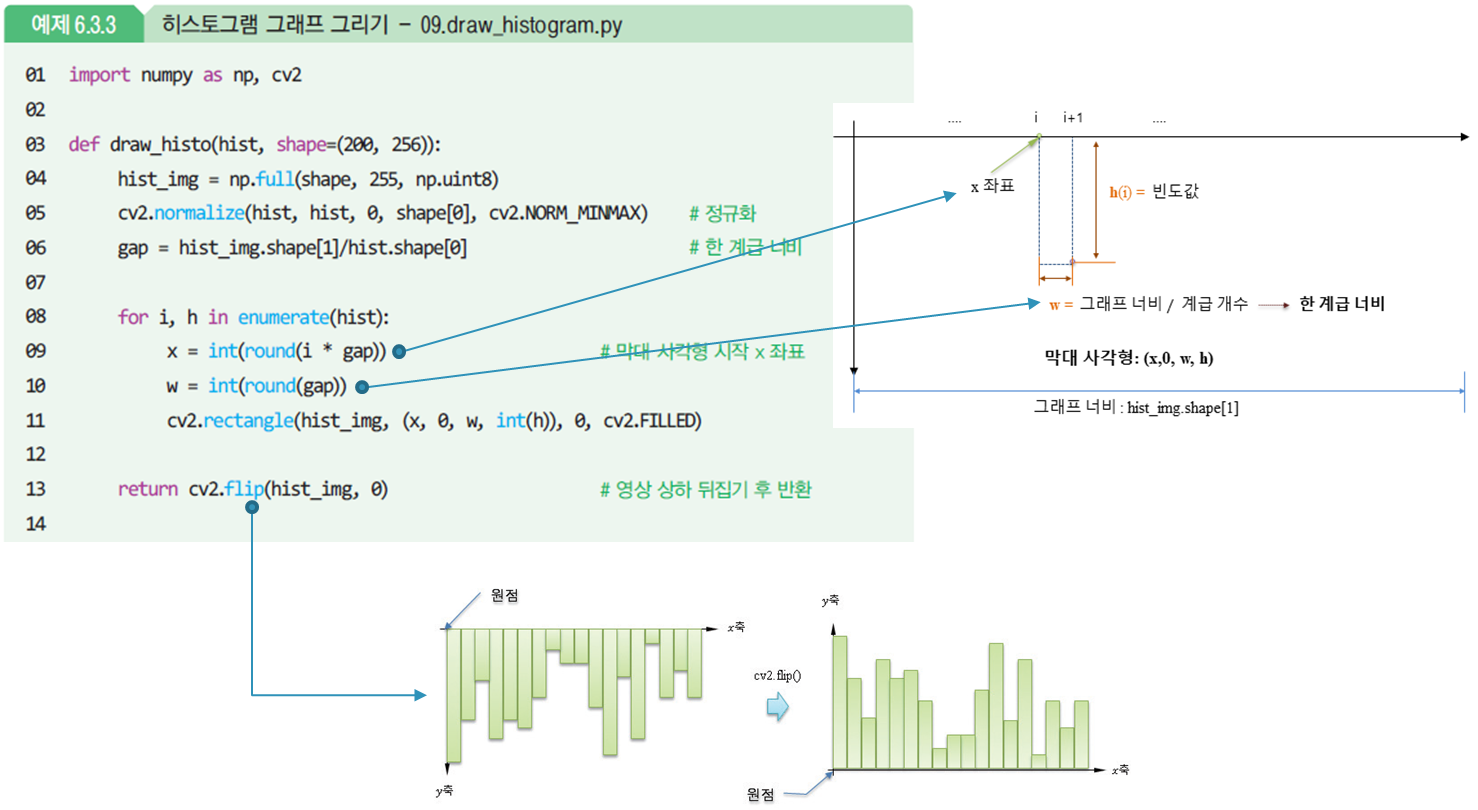

- OpenCV는 cv2.normalize()라는 함수로 정규화를 제공
    - dst = cv2.normalize(src, dst, alpha, beta, type_flag)
    - src: 정규화 이전의 데이터
    - dst: 정규화 이후의 데이터
    - alpha: 정규화 구간 1
    - beta: 정규화 구간 2, 구간 정규화가 아닌 경우 사용 안 함
    - type_flag: 정규화 알고리즘 선택 플래그 상수
        - alpha와 beta 구간으로 정규화하는 cv2.NORM_MINMAX
        - alpha와 beta 구간을 전체 합으로 나누는 cv2.NORM_L1
        - 단위 벡터로 정규화하는 cv2.NORM_L2
        - 최댓값으로 나누는 cv2.NORM_INF


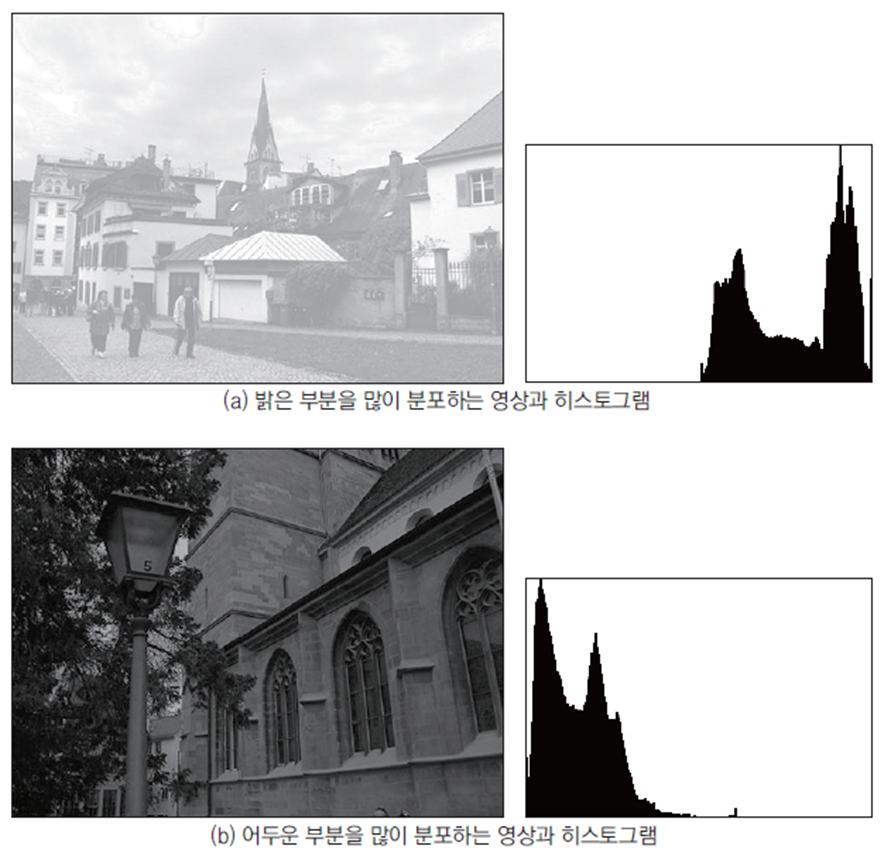

### 히스토그램 스트레칭

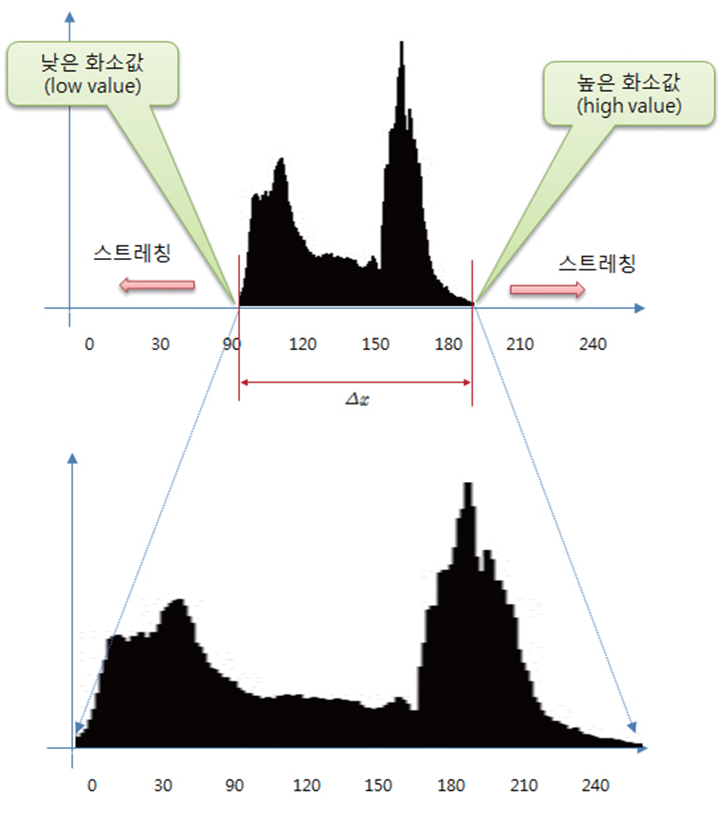
- 명암 분포가 좁은 히스토그램을 좌우로 잡아당겨(스트레칭해서) 고른 명암 분포를 가진 히스토그램이 되게 하는 것

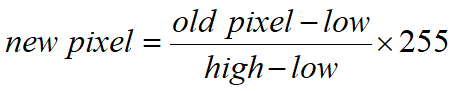

**[명암 대비 스트레칭 공식]: Min-Max Scaling (Normalization)**
- 0 ~ 255 사이로 mapping하기 위해서 255를 곱함
- old pixel은 원 영상 화소의 명도 값 (현재 화소 값)
- new pixel은 결과 영상 화소의 명도 값
- low는 히스토그램의 최저 명도 값
- high는 히스토그램의 최고 명도 값 


In [5]:
# 히스토그램 스트레칭 Code

import numpy as np
import cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        if h > 0: cv2.rectangle(hist_img, roi, 0, cv2.FILLED)
    return cv2.flip(hist_img, 0)                        # 영상 상하 뒤집기 후 반환

def search_value_idx(hist, bias = 0):
    for i in range(hist.shape[0]):
        idx = np.abs(bias - i)                     # 검색 위치 (처음 또는 마지막)
        if hist[idx] > 0:  return idx                             # 위치 반환
    return -1                                      # 대상 없으면 반환

image = cv2.imread("DIY/example/chap06/images/hist_stretch.jpg", cv2.IMREAD_GRAYSCALE)   # 영상읽기
if image is None:
    raise Exception("영상 파일 읽기 오류")

bsize, ranges = [64], [0,256]                        # 계급 개수 및 화소 범위
hist = cv2.calcHist([image], [0], None, bsize, ranges)

bin_width  = ranges[1]/bsize[0]                      # 계급 너비
high = search_value_idx(hist, bsize[0] - 1) * bin_width
low  = search_value_idx(hist, 0) * bin_width

idx = np.arange(0, 256)
idx = (idx - low) * 255/(high-low)	# 수식 적용하여 인덱스 생성
idx[0:int(low)] = 0
idx[int(high+1):] = 255

# dst = cv2.LUT(image, idx.astype('uint8'))
dst = idx.astype('uint8')[image]

# 룩업 테이블 사용하지 않고 직접 구현
# dst = np.zeros(image.shape, dtype=image.dtype)
# for i in range(dst.shape[0]):
#     for j in range(dst.shape[1]):
#         dst[i,j] = idx[image[i,j]]

hist_dst = cv2.calcHist([dst], [0], None, bsize, ranges)  # 결과 영상 히스토그램 재계산
hist_img = draw_histo(hist, (200,360))          # 원본 영상 히스토그램 그리기
hist_dst_img = draw_histo(hist_dst,(200,360))  # 결과 영상 히스토그램 그리기

print("high_value = ", high)
print("low_value = " , low)
cv2.imshow("image", image)
cv2.imshow("hist_img", hist_img)
cv2.imshow("dst", dst)
cv2.imshow("hist_dst_img", hist_dst_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

high_value =  180.0
low_value =  52.0


### 히스토그램 스트레칭 과제
1. 스트레칭의 문제점 & 어떤 상황에서 문제점이 생길 수 있는지
    - (문제점1) **히스토그램에 0인 값과 255인 값이 하나라도 있을 시(상황)** 스트레칭 효과가 떨어지게 된다(Outlier).
    - (문제점2) 히스토그램 스트레칭을 통해 분포도는 넓혀주었지만 **특정 그레이 스케일 값에 픽셀 분포가 뭉쳐있는(상황)** 문제는 해결할 수 없음. 
2. 그에 따른 해결책
    - (문제점1 해결) Ends-in search: 최대 최소로 부터 일정 비율(픽셀 개수의 비율)을 떼어내고 나머지를 가지고 스트레칭
    - (문제점2 해결) histogram equalization